In [38]:
import pandas as pd
file_path = 'Viral_Social_Media_Trends.csv'
df = pd.read_csv(file_path)

df.head()


,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [2]:
df.columns.tolist()

['Post_ID',
 'Platform',
 'Hashtag',
 'Content_Type',
 'Region',
 'Views',
 'Likes',
 'Shares',
 'Comments',
 'Engagement_Level']

## Pre-Processing

In [39]:
selected_columns = ['Platform', 'Hashtag', 'Likes', 'Comments', 'Views', 'Engagement_Level', 'Content_Type', 'Shares', 'Region']
df_selected = df[selected_columns].copy()

In [40]:
missing_values = df_selected.isnull().sum()
df_cleaned = df_selected.dropna()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def preprocess(df):
    df = df.copy()
    df['Hashtag'] = df['Hashtag'].str.replace('#', '', regex=False)

    platform_mapping = {'TikTok': 0, 'Instagram': 1, 'YouTube': 2, 'Twitter': 3}
    df['Platform'] = df['Platform'].map(platform_mapping)

    df['Engagement_Rate'] = (df['Likes'] + df['Shares'] + df['Comments']) / df['Views']
    df['Engagement_Level_Label'] = pd.qcut(df['Engagement_Rate'], q=3, labels=[0, 1, 2]).astype(int)

    y = df['Engagement_Level_Label']
    X = df.drop(columns=['Post_ID', 'Engagement_Level', 'Engagement_Rate', 'Engagement_Level_Label'], errors='ignore')

    X_encoded = pd.get_dummies(X, columns=['Hashtag', 'Content_Type', 'Region'], drop_first=True)

    hashtag_cols = [col for col in X_encoded.columns if col.startswith('Hashtag_')]
    X_encoded['Hashtag_Group'] = X_encoded[hashtag_cols].sum(axis=1)
    X_encoded.drop(columns=hashtag_cols, inplace=True)

    region_cols = [col for col in X_encoded.columns if col.startswith('Region_')]
    X_encoded['Region_Group'] = X_encoded[region_cols].sum(axis=1)
    X_encoded.drop(columns=region_cols, inplace=True)

    content_cols = [col for col in X_encoded.columns if col.startswith('Content_Type_')]
    X_encoded['Content_Group'] = X_encoded[content_cols].sum(axis=1)
    X_encoded.drop(columns=content_cols, inplace=True)

    platform_col = X_encoded['Platform']
    X_numerical = X_encoded.drop(columns=['Platform'])

    scaler = MinMaxScaler()
    X_scaled_array = scaler.fit_transform(X_numerical)
    X_scaled_numerical = pd.DataFrame(X_scaled_array, columns=X_numerical.columns)

    X_scaled = pd.concat([platform_col.reset_index(drop=True), X_scaled_numerical], axis=1)

    return X_scaled, y, scaler

df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\mesin dasar\\Viral_Social_Media_Trends.csv")  
X_ready, y_ready, scaler_ready = preprocess(df)
print(X_ready.head())


   Platform     Views     Likes    Shares  Comments  Hashtag_Group  \
0         0  0.832745  0.678653  0.531223  0.386753            0.0   
1         1  0.831240  0.429988  0.658567  0.544692            1.0   
2         3  0.733258  0.654049  0.394002  0.724462            0.0   
3         2  0.183404  0.253558  0.116436  0.736128            1.0   
4         0  0.012725  0.342131  0.695805  0.127224            1.0   

   Region_Group  Content_Group  
0           1.0            1.0  
1           1.0            1.0  
2           1.0            1.0  
3           0.0            1.0  
4           1.0            1.0  


In [42]:
y_ready.head()

0    1
1    0
2    1
3    1
4    2
Name: Engagement_Level_Label, dtype: int32

In [43]:
import joblib
joblib.dump(scaler_ready, "scaler.pkl")

['scaler.pkl']

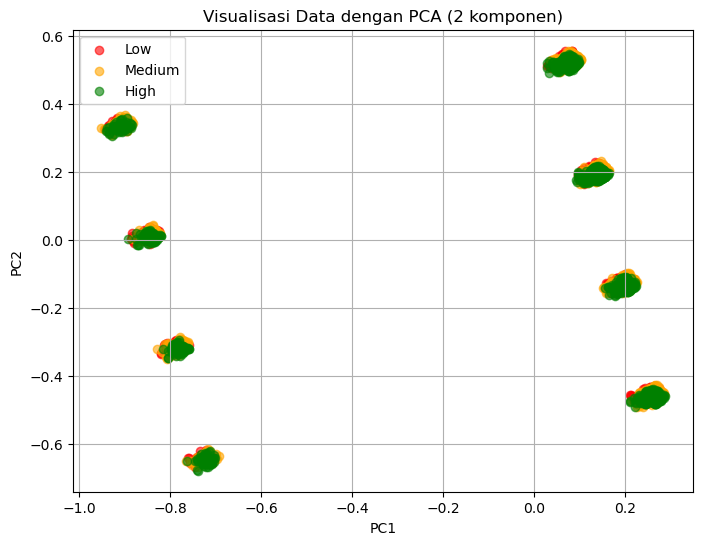

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_ready)

plt.figure(figsize=(8, 6))
colors = ['red', 'orange', 'green']
labels = ['Low', 'Medium', 'High']

for i, color in enumerate(colors):
    idx = y_ready == i
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], c=color, label=labels[i], alpha=0.6)

plt.title('Visualisasi Data dengan PCA (2 komponen)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()


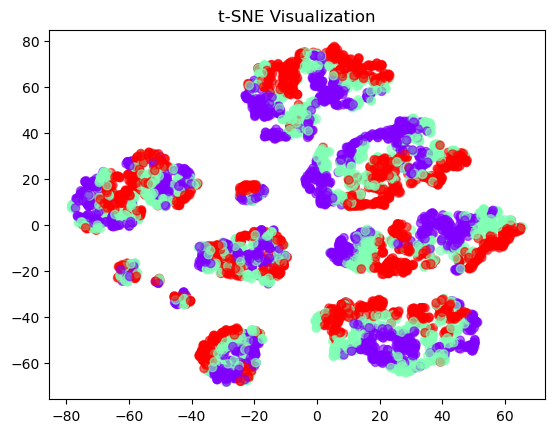

In [8]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_ready)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_ready, cmap='rainbow', alpha=0.6)
plt.title("t-SNE Visualization")
plt.show()


c:\Users\ASUS\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


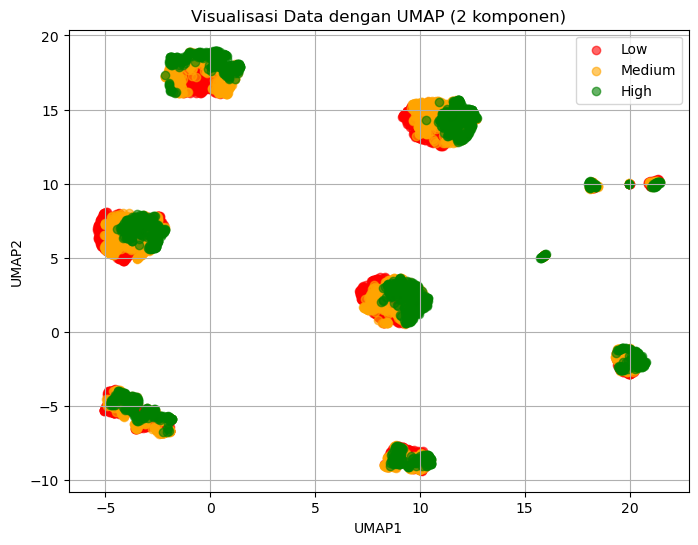

In [9]:
import umap.umap_ as umap 

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_ready)

plt.figure(figsize=(8, 6))
for i, color in enumerate(colors):
    idx = y_ready == i
    plt.scatter(X_umap[idx, 0], X_umap[idx, 1], c=color, label=labels[i], alpha=0.6)

plt.title('Visualisasi Data dengan UMAP (2 komponen)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
import pandas as pd
df = pd.DataFrame(X_ready)
df['label'] = y_ready
print(df.corr()['label'].sort_values(ascending=False))

label            1.000000e+00
Likes            5.043030e-01
Shares           8.633464e-02
Comments         5.236445e-02
Hashtag_Group    9.736688e-03
Content_Group    1.452918e-16
Platform        -6.169597e-03
Region_Group    -1.580504e-02
Views           -7.377019e-01
Name: label, dtype: float64


In [11]:
import numpy as np
unique, counts = np.unique(y_ready, return_counts=True)
print(dict(zip(unique, counts)))

{0: 1667, 1: 1666, 2: 1667}


## Modelling

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_ready, y_ready, test_size=0.2, random_state=42, stratify=y_ready
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 8), (1000, 8), (4000,), (1000,))

# KNN

In [45]:
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

def hitung_jarak_euclidean_batch(X_train, x_test):
    return np.sqrt(np.sum((X_train - x_test) ** 2, axis=1))

def hitung_jarak_manhattan_batch(X_train, x_test):
    return np.sum(np.abs(X_train - x_test), axis=1)

def knn(X_train, y_train, X_test, k, jarak_func): 
    prediksi = []
    X_train_np = X_train.to_numpy()
    y_train_np = y_train.to_numpy()
    X_test_np = X_test.to_numpy()

    for x_test in X_test_np:
        jarak = jarak_func(X_train_np, x_test)
        idx_terdekat = np.argsort(jarak)[:k]
        label_tetangga = y_train_np[idx_terdekat]
        nilai, jumlah = np.unique(label_tetangga, return_counts=True)
        prediksi.append(nilai[np.argmax(jumlah)])
    
    return np.array(prediksi)

def validasi_silang_kfold(X, y, k_values, jarak_func, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    hasil_akurasi = {k: [] for k in k_values}

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        for k in k_values:
            prediksi = knn(X_train, y_train, X_test, k, jarak_func)
            akurasi = np.mean(prediksi == y_test.to_numpy())
            hasil_akurasi[k].append(akurasi)

    rata_rata_akurasi = {k: np.mean(akurasi) for k, akurasi in hasil_akurasi.items()}
    return rata_rata_akurasi


In [46]:
k_values = list(range(1, 20, 2))
akurasi_euclidean = validasi_silang_kfold(X_train, y_train, k_values, hitung_jarak_euclidean_batch)
akurasi_manhattan = validasi_silang_kfold(X_train, y_train, k_values, hitung_jarak_manhattan_batch)

k_terbaik_euc = max(akurasi_euclidean, key=akurasi_euclidean.get)
k_terbaik_man = max(akurasi_manhattan, key=akurasi_manhattan.get)

print(f"K terbaik (Euclidean): {k_terbaik_euc}, Akurasi: {akurasi_euclidean[k_terbaik_euc]:.4f}")
print(f"K terbaik (Manhattan): {k_terbaik_man}, Akurasi: {akurasi_manhattan[k_terbaik_man]:.4f}")


K terbaik (Euclidean): 17, Akurasi: 0.8492
K terbaik (Manhattan): 19, Akurasi: 0.8535


k terbaik: 31, dengan akurasi cross-validation: 0.8714


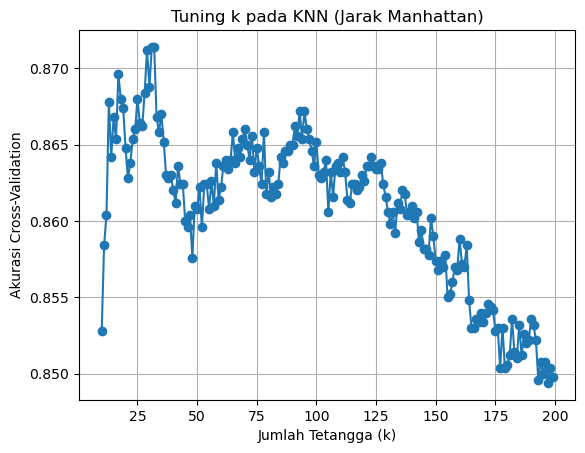

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

k_range = range(10, 200)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    score = cross_val_score(knn, X_ready, y_ready, cv=5)
    scores.append(score.mean())
best_k = k_range[np.argmax(scores)]
best_score = max(scores)

print(f"k terbaik: {best_k}, dengan akurasi cross-validation: {best_score:.4f}")
plt.plot(k_range, scores, marker='o')
plt.xlabel('Jumlah Tetangga (k)')
plt.ylabel('Akurasi Cross-Validation')
plt.title('Tuning k pada KNN (Jarak Manhattan)')
plt.grid(True)
plt.show()

# KNN + ACO (Feature Selection)

In [15]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split

def hitung_jarak_euclidean_batch(X_train, x_test):
    return np.sqrt(np.sum((X_train - x_test) ** 2, axis=1))

def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def knn(X_train, y_train, X_test, k, jarak_func): 
    prediksi = []
    for x_test in X_test:
        jarak = jarak_func(X_train, x_test)
        idx_terdekat = np.argsort(jarak)[:k]
        label_tetangga = y_train[idx_terdekat]
        nilai, jumlah = np.unique(label_tetangga, return_counts=True)
        prediksi.append(nilai[np.argmax(jumlah)])
    return np.array(prediksi)

def validasi_silang_kfold(X, y, k_values, jarak_func, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    hasil_akurasi = {k: [] for k in k_values}

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx].to_numpy(), X.iloc[test_idx].to_numpy()
        y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()

        for k in k_values:
            prediksi = knn(X_train, y_train, X_test, k, jarak_func)
            akurasi = calculate_accuracy(y_test, prediksi)
            hasil_akurasi[k].append(akurasi)

    rata_rata_akurasi = {k: np.mean(akurasi) for k, akurasi in hasil_akurasi.items()}
    return rata_rata_akurasi
def calculate_probabilities(pheromone, heuristic, alpha, beta, available_features):
    tau = pheromone[available_features] ** alpha
    eta = heuristic[available_features] ** beta
    probs = tau * eta
    return probs / (np.sum(probs) + 1e-10)

def update_pheromone(pheromone, ants_solutions, ants_scores, evaporation_rate):
    pheromone *= (1 - evaporation_rate)
    for features, score in zip(ants_solutions, ants_scores):
        pheromone += features * score
    return pheromone

def aco_feature_selection(X_ready, y_ready, n_ants=10, n_iter=20, alpha=1, beta=2, rho=0.2, k=1, distance_func=None):
    n_features = X_ready.shape[1]
    pheromone = np.ones(n_features)
    heuristic = 1 / (1 + np.std(X_ready, axis=0))
    best_accuracy = 0
    best_solution = np.zeros(n_features)
    X_train, X_test, y_train, y_test = train_test_split(X_ready, y_ready, test_size=0.3, random_state=42)

    for iterasi in range(n_iter):
        ants_solutions = []
        ants_scores = []

        for _ in range(n_ants):
            selected_features = np.zeros(n_features)
            available_features = np.arange(n_features)
            prev_acc = 0

            while len(available_features) > 0:
                probs = calculate_probabilities(pheromone, heuristic, alpha, beta, available_features)
                selected = np.random.choice(available_features, p=probs)
                selected_features[selected] = 1
                available_features = available_features[available_features != selected]

                cols = np.where(selected_features == 1)[0]
                if len(cols) == 0:
                    break

                X_train_sub = X_train[:, cols]
                X_test_sub = X_test[:, cols]

                y_pred = knn(X_train_sub, y_train, X_test_sub, k=k, jarak_func=distance_func)
                acc = calculate_accuracy(y_test, y_pred)

                if acc <= prev_acc:
                    break
                prev_acc = acc

            ants_solutions.append(selected_features)
            ants_scores.append(prev_acc)

            if prev_acc > best_accuracy:
                best_accuracy = prev_acc
                best_solution = selected_features.copy()

        pheromone = update_pheromone(pheromone, ants_solutions, ants_scores, rho)
        print(f"Iterasi {iterasi+1:02d}: Akurasi terbaik = {best_accuracy:.4f} | Jumlah fitur = {int(np.sum(best_solution))}")

    selected_indices = np.where(best_solution == 1)[0]
    return selected_indices, best_accuracy
k_values = list(range(1, 20, 2))

akurasi_euclidean = validasi_silang_kfold(X_train, y_train, k_values, hitung_jarak_euclidean_batch)
k_terbaik = max(akurasi_euclidean, key=akurasi_euclidean.get)

print(f"K terbaik (Euclidean): {k_terbaik}, Akurasi: {akurasi_euclidean[k_terbaik]:.4f}")
X_ready = X_train.to_numpy()
y_ready = y_train.to_numpy()

selected_features, best_acc = aco_feature_selection(
    X_ready, y_ready,
    n_ants=10, n_iter=20,
    alpha=1, beta=2, rho=0.2,
    k=k_terbaik,
    distance_func=hitung_jarak_euclidean_batch
)

print("\nFitur terpilih (indeks):", selected_features)
print("Akurasi terbaik:", round(best_acc, 4))


K terbaik (Euclidean): 17, Akurasi: 0.8660
Iterasi 01: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 02: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 03: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 04: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 05: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 06: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 07: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 08: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 09: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 10: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 11: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 12: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 13: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 14: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 15: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 16: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Iterasi 17: Akurasi terbaik = 0.9442 | Jumlah fitur = 4
Itera

In [48]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split

def hitung_jarak_manhattan_batch(X_train, x_test):
    return np.sum(np.abs(X_train - x_test), axis=1)

def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def knn(X_train, y_train, X_test, k, jarak_func): 
    prediksi = []
    for x_test in X_test:
        jarak = jarak_func(X_train, x_test)
        idx_terdekat = np.argsort(jarak)[:k]
        label_tetangga = y_train[idx_terdekat]
        nilai, jumlah = np.unique(label_tetangga, return_counts=True)
        prediksi.append(nilai[np.argmax(jumlah)])
    return np.array(prediksi)

def validasi_silang_kfold(X, y, k_values, jarak_func, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    hasil_akurasi = {k: [] for k in k_values}

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx].to_numpy(), X.iloc[test_idx].to_numpy()
        y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()

        for k in k_values:
            prediksi = knn(X_train, y_train, X_test, k, jarak_func)
            akurasi = calculate_accuracy(y_test, prediksi)
            hasil_akurasi[k].append(akurasi)

    rata_rata_akurasi = {k: np.mean(akurasi) for k, akurasi in hasil_akurasi.items()}
    return rata_rata_akurasi

def calculate_probabilities(pheromone, heuristic, alpha, beta, available_features):
    tau = pheromone[available_features] ** alpha
    eta = heuristic[available_features] ** beta
    probs = tau * eta
    return probs / (np.sum(probs) + 1e-10)

def update_pheromone(pheromone, ants_solutions, ants_scores, evaporation_rate):
    pheromone *= (1 - evaporation_rate)
    for features, score in zip(ants_solutions, ants_scores):
        pheromone += features * score
    return pheromone

def aco_feature_selection(X_ready, y_ready, n_ants=10, n_iter=20, alpha=1, beta=2, rho=0.2, k=1, distance_func=None):
    n_features = X_ready.shape[1]
    pheromone = np.ones(n_features)
    heuristic = 1 / (1 + np.std(X_ready, axis=0))
    best_accuracy = 0
    best_solution = np.zeros(n_features)

    X_train, X_test, y_train, y_test = train_test_split(X_ready, y_ready, test_size=0.3, random_state=42)

    for iterasi in range(n_iter):
        ants_solutions = []
        ants_scores = []

        for _ in range(n_ants):
            selected_features = np.zeros(n_features)
            available_features = np.arange(n_features)
            prev_acc = 0

            while len(available_features) > 0:
                probs = calculate_probabilities(pheromone, heuristic, alpha, beta, available_features)
                selected = np.random.choice(available_features, p=probs)
                selected_features[selected] = 1
                available_features = available_features[available_features != selected]

                cols = np.where(selected_features == 1)[0]
                if len(cols) == 0:
                    break

                X_train_sub = X_train[:, cols]
                X_test_sub = X_test[:, cols]

                y_pred = knn(X_train_sub, y_train, X_test_sub, k=k, jarak_func=distance_func)
                acc = calculate_accuracy(y_test, y_pred)

                if acc <= prev_acc:
                    break
                prev_acc = acc

            ants_solutions.append(selected_features)
            ants_scores.append(prev_acc)

            if prev_acc > best_accuracy:
                best_accuracy = prev_acc
                best_solution = selected_features.copy()

        pheromone = update_pheromone(pheromone, ants_solutions, ants_scores, rho)
        print(f"Iterasi {iterasi+1:02d}: Akurasi terbaik = {best_accuracy:.4f} | Jumlah fitur = {int(np.sum(best_solution))}")

    selected_indices = np.where(best_solution == 1)[0]
    return selected_indices, best_accuracy

k_values = list(range(1, 20, 2))

akurasi_manhattan = validasi_silang_kfold(X_train, y_train, k_values, hitung_jarak_manhattan_batch)
k_terbaik_manhattan = max(akurasi_manhattan, key=akurasi_manhattan.get)

print(f"K terbaik (Manhattan): {k_terbaik_manhattan}, Akurasi: {akurasi_manhattan[k_terbaik_manhattan]:.4f}")

X_ready = X_train.to_numpy()
y_ready = y_train.to_numpy()

selected_features, best_acc = aco_feature_selection(
    X_ready, y_ready,
    n_ants=10, n_iter=20,
    alpha=1, beta=2, rho=0.2,
    k=k_terbaik_manhattan,
    distance_func=hitung_jarak_manhattan_batch
)

print("\nFitur terpilih (indeks):", selected_features)
print("Akurasi terbaik:", round(best_acc, 4))


K terbaik (Manhattan): 19, Akurasi: 0.8535
Iterasi 01: Akurasi terbaik = 0.9333 | Jumlah fitur = 6
Iterasi 02: Akurasi terbaik = 0.9333 | Jumlah fitur = 6
Iterasi 03: Akurasi terbaik = 0.9408 | Jumlah fitur = 5
Iterasi 04: Akurasi terbaik = 0.9408 | Jumlah fitur = 5
Iterasi 05: Akurasi terbaik = 0.9408 | Jumlah fitur = 5
Iterasi 06: Akurasi terbaik = 0.9408 | Jumlah fitur = 5
Iterasi 07: Akurasi terbaik = 0.9408 | Jumlah fitur = 5
Iterasi 08: Akurasi terbaik = 0.9408 | Jumlah fitur = 5
Iterasi 09: Akurasi terbaik = 0.9408 | Jumlah fitur = 5
Iterasi 10: Akurasi terbaik = 0.9408 | Jumlah fitur = 5
Iterasi 11: Akurasi terbaik = 0.9408 | Jumlah fitur = 5
Iterasi 12: Akurasi terbaik = 0.9500 | Jumlah fitur = 4
Iterasi 13: Akurasi terbaik = 0.9500 | Jumlah fitur = 4
Iterasi 14: Akurasi terbaik = 0.9500 | Jumlah fitur = 4
Iterasi 15: Akurasi terbaik = 0.9500 | Jumlah fitur = 4
Iterasi 16: Akurasi terbaik = 0.9500 | Jumlah fitur = 4
Iterasi 17: Akurasi terbaik = 0.9500 | Jumlah fitur = 4
Itera

In [49]:
all_feature_names = X_train.columns.to_list()
selected_indices = selected_features
fitur_terpilih_nama = [all_feature_names[i] for i in selected_indices]
print("Fitur terpilih (nama):", fitur_terpilih_nama)


Fitur terpilih (nama): ['Views', 'Likes', 'Shares', 'Comments']


In [50]:
import pickle

selected_features = selected_features  
k_terbaik_manhattan = k_terbaik_manhattan  
model_saya = {
    "selected_indices": selected_features,
    "k": k_terbaik_manhattan,
    "distance_name": "manhattan"
}

with open("model_knn_aco.pkl", "wb") as file:
    pickle.dump(model_saya, file)

print("Model berhasil disimpan ke model_knn_aco.pkl")


Model berhasil disimpan ke model_knn_aco.pkl


In [51]:
import pandas as pd

pd.DataFrame(X_ready).to_csv("X_train.csv", index=False)
pd.DataFrame(y_ready).to_csv("y_train.csv", index=False)
